# set up

In [219]:
## crawling
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
import time 
## for processing
from konlpy.tag import Hannanum
import re
import pandas as pd
import numpy as np
import csv
import sys
## visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
## interactiveshell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Crawling

In [123]:
## ÌÅ¨Î°§ÎßÅ Ìï®Ïàò
def crawling(url):
    #Îç∞Ïù¥ÌÑ∞ Îã¥ÏùÑ empty list
    str_youtube_comments = [] 
    str_youtube_like = [] 
    #chrome driver 
    driver = webdriver.Chrome('/Users/hwangjaewon/Desktop/chromedriver')
    driver.get(url) 
    #dowm the scroll
    last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    while True: 
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
        time.sleep(10) 
        new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_page_height == last_page_height: 
            break 
        else:
            last_page_height = new_page_height 
    #parse the page
    html_source = driver.page_source 
    soup = BeautifulSoup(html_source, 'lxml')
    youtube_comments_1 = soup.select('yt-formatted-string#content-text')
    youtube_like_1 = soup.select('span#vote-count-middle')
    print(youtube_like_1)
    print(youtube_comments_1)
    #function of remain Korean
    def re_sentence(s): 
        a = re.compile('[^ „Ñ±-„Ö£Í∞Ä-Ìû£+]')
        result = a.sub('', s) 
        return(result)
    #processing
    for i in range(len(youtube_comments_1)): 
        # print(str_tmp) 
        str_tmp = str(youtube_comments_1[i].text) 
        str_tmp = str_tmp.replace('\n', '') 
        str_tmp = str_tmp.replace('\t', '') 
        str_tmp = str_tmp.replace(' ', '') 
        str_tmp = re_sentence(str_tmp)
        str_youtube_comments.append(str_tmp)
    print(str_youtube_comments)
    for i in range(len(youtube_like_1)): 
        str_tmp = str(youtube_like_1[i].text) 
        str_tmp = str_tmp.replace('\n', '') 
        str_tmp = str_tmp.replace('\t', '') 
        str_tmp = str_tmp.replace(' ', '') 
        str_youtube_like.append(str_tmp)
    print(str_youtube_like)
    # Make DF
    pd_data = {"Comment":str_youtube_comments, "Likes":str_youtube_like } 
    youtube_pd = pd.DataFrame(pd_data)
    driver.close()
    return youtube_pd

In [127]:
## DailyÎç∞ÏùºÎ¶¨
daily_1=crawling('https://www.youtube.com/watch?v=GYoLCL5czc4')
daily_2=crawling('https://www.youtube.com/watch?v=It49V0PVxkY&t=87s')
daily_3=crawling('https://www.youtube.com/watch?v=RlGKu-H8FSY')
daily_4=crawling('https://www.youtube.com/watch?v=SdAZRcE8jTM')
daily_5=crawling('https://www.youtube.com/watch?v=d0yQE5a2rbc')

[<span class="style-scope ytd-comment-action-buttons-renderer" hidden="" id="vote-count-middle">
    0
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 2Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 3Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    3
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span class="style-scope ytd-comment-action-buttons-renderer" hidden="" id="vote-count-middle">
    0
  </span>, <span class="style-scope ytd-comment-action-buttons-renderer" hidden="" id="vote-count-middle">
    0
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 4Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    4
  </span>, <span

In [128]:
daily_1.to_csv('daily_1.csv')
daily_2.to_csv('daily_2.csv')
daily_3.to_csv('daily_3.csv')
daily_4.to_csv('daily_4.csv')
daily_5.to_csv('daily_5.csv')

In [241]:
daily=pd.concat([daily_1,daily_2,daily_3,daily_4,daily_5], axis=0)
daily['channel']='daily'
daily.head()

Comment Likes channel
0          ÏòÅÏÉÅÎØ∏Í∞ÄÎÑàÎ¨¥ÏòàÎªêÏöî„Öú„ÖúÍ≥µÎ∂ÄÎèÑÏó¥Ïã¨ÌûàÌïòÏãúÍµ¨ÎÑòÎÑòÎåÄÎã®ÌïòÏÖîÏöî     0   daily
1  Îç∞ÏùºÎ¶¨ÎãòÏòÅÏÉÅÎßåÎèåÎ†§Î≥¥Î©¥ÏÑúÏóÑÏ≤≠Í∏∞Îã§Î†∏Ïñ¥Ïöî„Öú„ÖúÎÑàÎ¨¥Î≥¥Í≥†Ïã∂ÏóàÍ≥†Î∂ÑÏúÑÍ∏∞Ïß±Ïù¥ÏóêÏöî     2   daily
2               Îç∞ÏùºÎ¶¨ÎãòÎ∏åÏù¥Î°úÍ∑∏Í∞ÄÏ†úÏùºÎ∂ÑÏúÑÍ∏∞ÎèÑÏòàÏÅòÍ≥†Ïû¨Î∞åÏñ¥Ïöî     3   daily
3                            Ïñ∏ÎãàÏôÑÏ†ÑÏù¥ÎªêÏöî„Ö†„Ö†     1   daily
4                           Î∞©ÏÜåÍ∞úÏòÅÏÉÅÏ∞çÏñ¥Ï£ºÏÑ∏Ïöî     1   daily

---

In [138]:
##ÏùÄÏÑúeunseo
eunseo_1=crawling('https://www.youtube.com/watch?v=TW2kDcAmCKk&t=8s')
eunseo_2=crawling('https://www.youtube.com/watch?v=zTIV3i6QxLE')
eunseo_3=crawling('https://www.youtube.com/watch?v=ZTFEalXrs6A')
eunseo_4=crawling('https://www.youtube.com/watch?v=TXVcrkNf6CU')
eunseo_5=crawling('https://www.youtube.com/watch?v=nP3C_AdXPZs')

[<span aria-label="Ï¢ãÏïÑÏöî 330Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    330
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 2Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 20Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    20
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 4Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    4
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 2Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-butt

In [ ]:
eunseo_1.to_csv('eunseo_1.csv')
eunseo_2.to_csv('eunseo_2.csv')
eunseo_3.to_csv('eunseo_3.csv')
eunseo_4.to_csv('eunseo_4.csv')
eunseo_5.to_csv('eunseo_5.csv')

In [242]:
eunseo=pd.concat([eunseo_1,eunseo_2,eunseo_3,eunseo_4,eunseo_5], axis=0)
eunseo['channel']='eunseo'
eunseo.head()

Comment Likes channel
0                  Î¨¥Ï±ÑÏÉâÍ∞¨ÏÑ±ÎØ∏Ï≥§Ïñ¥ÏöîÏßÑÏßúÌôîÏù¥Ìä∏Î∂ÄÌÑ∞Í∞êÏÑ±Ïò§ÏßÄÍ≥†ÏßÑÏßúÏù¥Ïñ∏ÎãàÏòÅÏÉÅÌôòÏû•ÌïòÍ≤†ÎÑ§   330  eunseo
1  Ïò§ÎûúÎßåÏóêÏòÅÏÉÅÎã§ÏãúÏ†ïÏ£ºÌñâÌïòÍ≥†ÏûàÎäîÎç∞ÏÉâÍ∞êÎèÑÎ∂ÑÏúÑÍ∏∞ÎèÑÎÑàÎ¨¥Ïù¥ÎªêÏöîÍ≥µÎ∂ÄÎèÑÏóÑÏ≤≠Ïó¥Ïã¨ÌûàÌïòÏãúÎäîÍ±∞Í∞ôÏïÑÏöîÏùÄÏÑúÎãò...     2  eunseo
2            ÏßÑÏßúÌé∏ÏßëÏä§ÌÇ¨Í≥ÑÏÜçÎäêÎäîÎ™®ÏäµÏù¥ÌóàÏö∞ÎåÄÎã®ÌïòÏã≠ÎØ∏ÎåúÏùÄÏÑúÎãòÌï≠ÏÉÅÏûêÍ∑πÎ∞õÍ≤åÌï¥Ï£ºÏÖîÏÑúÍ∞êÏÇ¨Ìï©ÎãàÎã§    20  eunseo
3  ÏùÄÏÑúÎãò„Öú„ÖúÎ¨¥Ï±ÑÏÉâÍ∞êÏÑ±ÏßÑÏßúÎÑòÏòàÏÅòÎã§Íµ¨ÏöîÌï≠ÏÉÅÏûòÎ≥¥Íµ¨ÏûàÍ≥†Ïô∏Î°úÏö∏ÎïêÏùÄÏÑúÎãòÏòÅÏÉÅÎ≥¥Î©¥ÏÑúÍ∞êÎèôÎ∞õÍ≥†Í∑∏Îü¨Íµ¨ÏûàÏñ¥...     4  eunseo
4                         ÏôÄÎèôÍ∞ëÏù∏Îç∞Ï†ÄÎ†áÍ≤åÏòàÏÅòÍ≤åÌï¥ÎÜìÍ≥†ÏÇ¨ÎäîÍ±∞Î≥¥Î©¥ÎÑòÏ°¥Í≤ΩÏä§Îü¨ÏõåÏöî     2  eunseo

---

In [146]:
## ÌïÑÎ¶ºfeellim
feellim_1=crawling('https://www.youtube.com/watch?v=UyySW1OCGwE')
feellim_2=crawling('https://www.youtube.com/watch?v=yPHvn-zrtiI&t=2s')
feellim_3=crawling('https://www.youtube.com/watch?v=aCOk4EXP-3g')
feellim_4=crawling('https://www.youtube.com/watch?v=l4IiyE5dd-A')
feellim_5=crawling('https://www.youtube.com/watch?v=lA6kjuAvoH8')

[<span aria-label="Ï¢ãÏïÑÏöî 6Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    6
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 16Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    16
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 80Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    80
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 20Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    20
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    1
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 2Í∞ú" class="style-scope ytd-comment-action-buttons-renderer" id="vote-count-middle">
    2
  </span>, <span aria-label="Ï¢ãÏïÑÏöî 1Í∞ú" class="style-scope ytd-comment-action-butt

In [ ]:
feellim_1.to_csv('feellim_1.csv')
feellim_2.to_csv('feellim_2.csv')
feellim_3.to_csv('feellim_3.csv')
feellim_4.to_csv('feellim_4.csv')
feellim_5.to_csv('feellim_5.csv')

In [243]:
feellim=pd.concat([feellim_1,feellim_2,feellim_3,feellim_4,feellim_5], axis=0)
feellim['channel']='feellim'
feellim.head()

Comment Likes  channel
0             Ï†ïÎßêÏßÄÎèÖÌïúÎ∏îÎûôÎçïÌõÑÎ°úÏç®Î™∏Í≥ºÎßàÏùåÏù¥Ìé∏ÏïàÌï¥ÏßÄÎÑ§ÏöîÍ∞êÏÇ¨Ìï©ÎãàÎã§     6  feellim
1  Ïò§„ÖìÏö∞Ï†ÄÎèÑÎÇòÎ¶ÑÎ∏îÎûôÏ°∞ÏïÑÌïúÎã§ÏÉùÍ∞ÅÌñàÎäîÎç∞ÏÜêÌÜ±ÍπéÏù¥ÎûëÍ≥†Î¨¥Ïû•Í∞ëÏùÄÏÉÅÏÉÅÎèÑÎ™ªÌñàÎÑ§Ïó¨„Öã„Öã„Öã    16  feellim
2                      Î∏îÎûôÏÑ±Ïï†ÏûêÎ°úÏÑúÎÑàÎ¨¥Í∞êÎ™ÖÍπäÏùÄÍ≥µÍ∞ÑÏù¥ÎÑ§Ïöî    80  feellim
3                       Î∏îÎûôÎß§Î†•Ïù¥ÎÑàÎ¨¥Ï¢ãÏïÑÏöîÌï≠ÏÉÅÏùëÏõêÌï©ÎãàÎã§     1  feellim
4        Ïñ¥Ïúº„Ö°ÏßÑÏßúÏ†úÍ∞ÄÏõêÌïòÎçòÏßëÏûÖÎãàÎã§„Öú„Öú„Öú„ÖúÎåÄÎ¶¨ÎßåÏ°±Í∞êÏÇ¨Ìï¥Ïöî„Öú„Öú„Öú„Öú„Öú„Öú    20  feellim

---

# Ï±ÑÎÑêÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù

In [205]:
from konlpy.tag import Komoran
from konlpy.tag import Twitter, Kkma, Mecab, Hannanum
import konlpy
okt = konlpy.tag.Okt()
twitter = Twitter()
kkma = Kkma()
mecab = Mecab()
hannanum = Hannanum()
komoran = Komoran() 

In [206]:
def make_df(channel):
    list_df=list(np.array(channel["Comment"].tolist()))
    em_list=[]
    i=0

    for i in range(len(list_df)):
        a=list_df[i]
        j=0
        for j in range(len(a)):
            em_list.append(a[j][0])
    joined_str = "".join(em_list) 
    
    morph = twitter.pos(joined_str)
    sentences_tag = []
    sentences_tag.append(morph)
    
    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','Adverb']: 
                noun_adj_list.append(word)
    df=pd.DataFrame(noun_adj_list)
    return df

In [207]:
stopword_list = []

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result
                
# Ìïú Í∏ÄÏûê Îã®Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result

def tokenizing_and_cleaning(raw_text):
    token = okt.nouns(raw_text)
    stopwords = remove_stopwords(token)
    meaningful_words = remove_onewords(stopwords)
    data_list.append(meaningful_words)

## daily Ï±ÑÎÑê Îã®Ïñ¥ ÎπàÎèÑÏàò Î∞è ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [208]:
daily_word=make_df(daily)

data_list = []
daily_word[0].apply(tokenizing_and_cleaning)

0      None
1      None
2      None
3      None
4      None
       ... 
794    None
795    None
796    None
797    None
798    None
Name: 0, Length: 799, dtype: object

In [209]:
# data_list Î¶¨Ïä§Ìä∏ ÏïàÏùò Îã®Ïñ¥Îì§Î°ú ÌÜ†ÌÅ∞Îßå Îì§Ïñ¥ÏûàÎäî Î¶¨Ïä§Ìä∏Î•º ÎßåÎì†Îã§.
word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Ïñ¥Ï§ÄÎã§.
all_token = pd.DataFrame(word_list, columns = ["ÌÜ†ÌÅ∞"])
c=Counter(all_token["ÌÜ†ÌÅ∞"])
most_word=c.most_common(200)
most_token = pd.DataFrame(most_word, columns = ["Îã®Ïñ¥ ÌÜ†ÌÅ∞", "ÎπàÎèÑ Ïàò"])
word_dict=dict(c.most_common(500))
word_dict

{'ÏòÅÏÉÅ': 35,
 'Í∞êÏÑ±': 25,
 'Ï†ïÎ≥¥': 20,
 'ÏßÑÏßú': 15,
 'ÏùºÎ¶¨': 12,
 'Î∂ÑÏúÑÍ∏∞': 12,
 'ÌòπÏãú': 12,
 'Ï±ÖÏÉÅ': 9,
 'Í≥µÎ∂Ä': 7,
 'Ïò§Îäò': 7,
 'Íµ¨ÎèÖ': 7,
 'Î∏åÏù¥': 6,
 'Î°úÍ∑∏': 6,
 'Ìï≠ÏÉÅ': 6,
 'ÏôÑÏ†Ñ': 5,
 'Ìé∏Ïßë': 5,
 'ÎèÖÏÑú': 5,
 'Î∞©ÏÜå': 4,
 'ÌûêÎßÅ': 4,
 'ÌÉÅÏÉÅ': 4,
 'ÏãúÍ≥Ñ': 4,
 'Í∞ÄÏö©': 3,
 'Í∞êÏÉÅ': 3,
 'Ï†ïÎßê': 3,
 'Ïä§ÌÑ∞Îîî': 3,
 'ÏÇ¨Ïö©': 3,
 'Î≥¥Í≥†': 3,
 'ÎÖ∏Îûò': 3,
 'ÎåÄÎ∞ï': 3,
 'Î™®Ïäµ': 2,
 'Í∑∏Í±∞': 2,
 'ÏûêÏºì': 2,
 'ÏöîÎÇò': 2,
 'Ï§ëÍ∞Ñ': 2,
 'ÏπúÍµ¨': 2,
 'ÏàòÎä•': 2,
 'Ïó≠Ïãú': 2,
 'Ìà¨Ïñ¥': 2,
 'Îã¨Î†•': 2,
 'Ïù∏Ïä§ÌÉÄ': 2,
 'ÏöîÏ¶ò': 2,
 'ÌôîÏù¥ÌåÖ': 2,
 'ÏßëÏ§ë': 2,
 'ÏàôÏ†ú': 2,
 'ÏïÑÏù¥Ìå®Îìú': 2,
 'Ïñ¥Îîî': 2,
 'Ïù¥Î∂Ñ': 2,
 'Ï†úÎ™©': 2,
 'ÏûêÎ™Ö': 2,
 'ÎèôÍ∞ë': 2,
 'ÏöîÏöî': 2,
 'Ìè≠Î∞ú': 2,
 'ÏÉÅÎØ∏': 1,
 'Ï†úÏùº': 1,
 'Ïñ∏Îãà': 1,
 'ÏÇ¨Ïãú': 1,
 'Ï£ºÏã¨': 1,
 'Î∞©Ïù¥': 1,
 'Ï∞∏Í≥†': 1,
 'ÏôúÏïà': 1,
 'Ï†úÎ∞ú': 1,
 'Î∞îÎû®': 1,
 'Í≥µÎ∂ÄÏûê': 1,
 'Ïò§ÏÑ§Î°ù': 1,
 'ÎèôÎ∞±ÍΩÉ': 1,
 'ÎèÑÍ≥µ': 1,
 'Î∂ÄÏûê': 1,
 'ÏπòÎßà': 1,
 'Í∞ÄÏùÑ': 1,


<Figure size 7200x7200 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

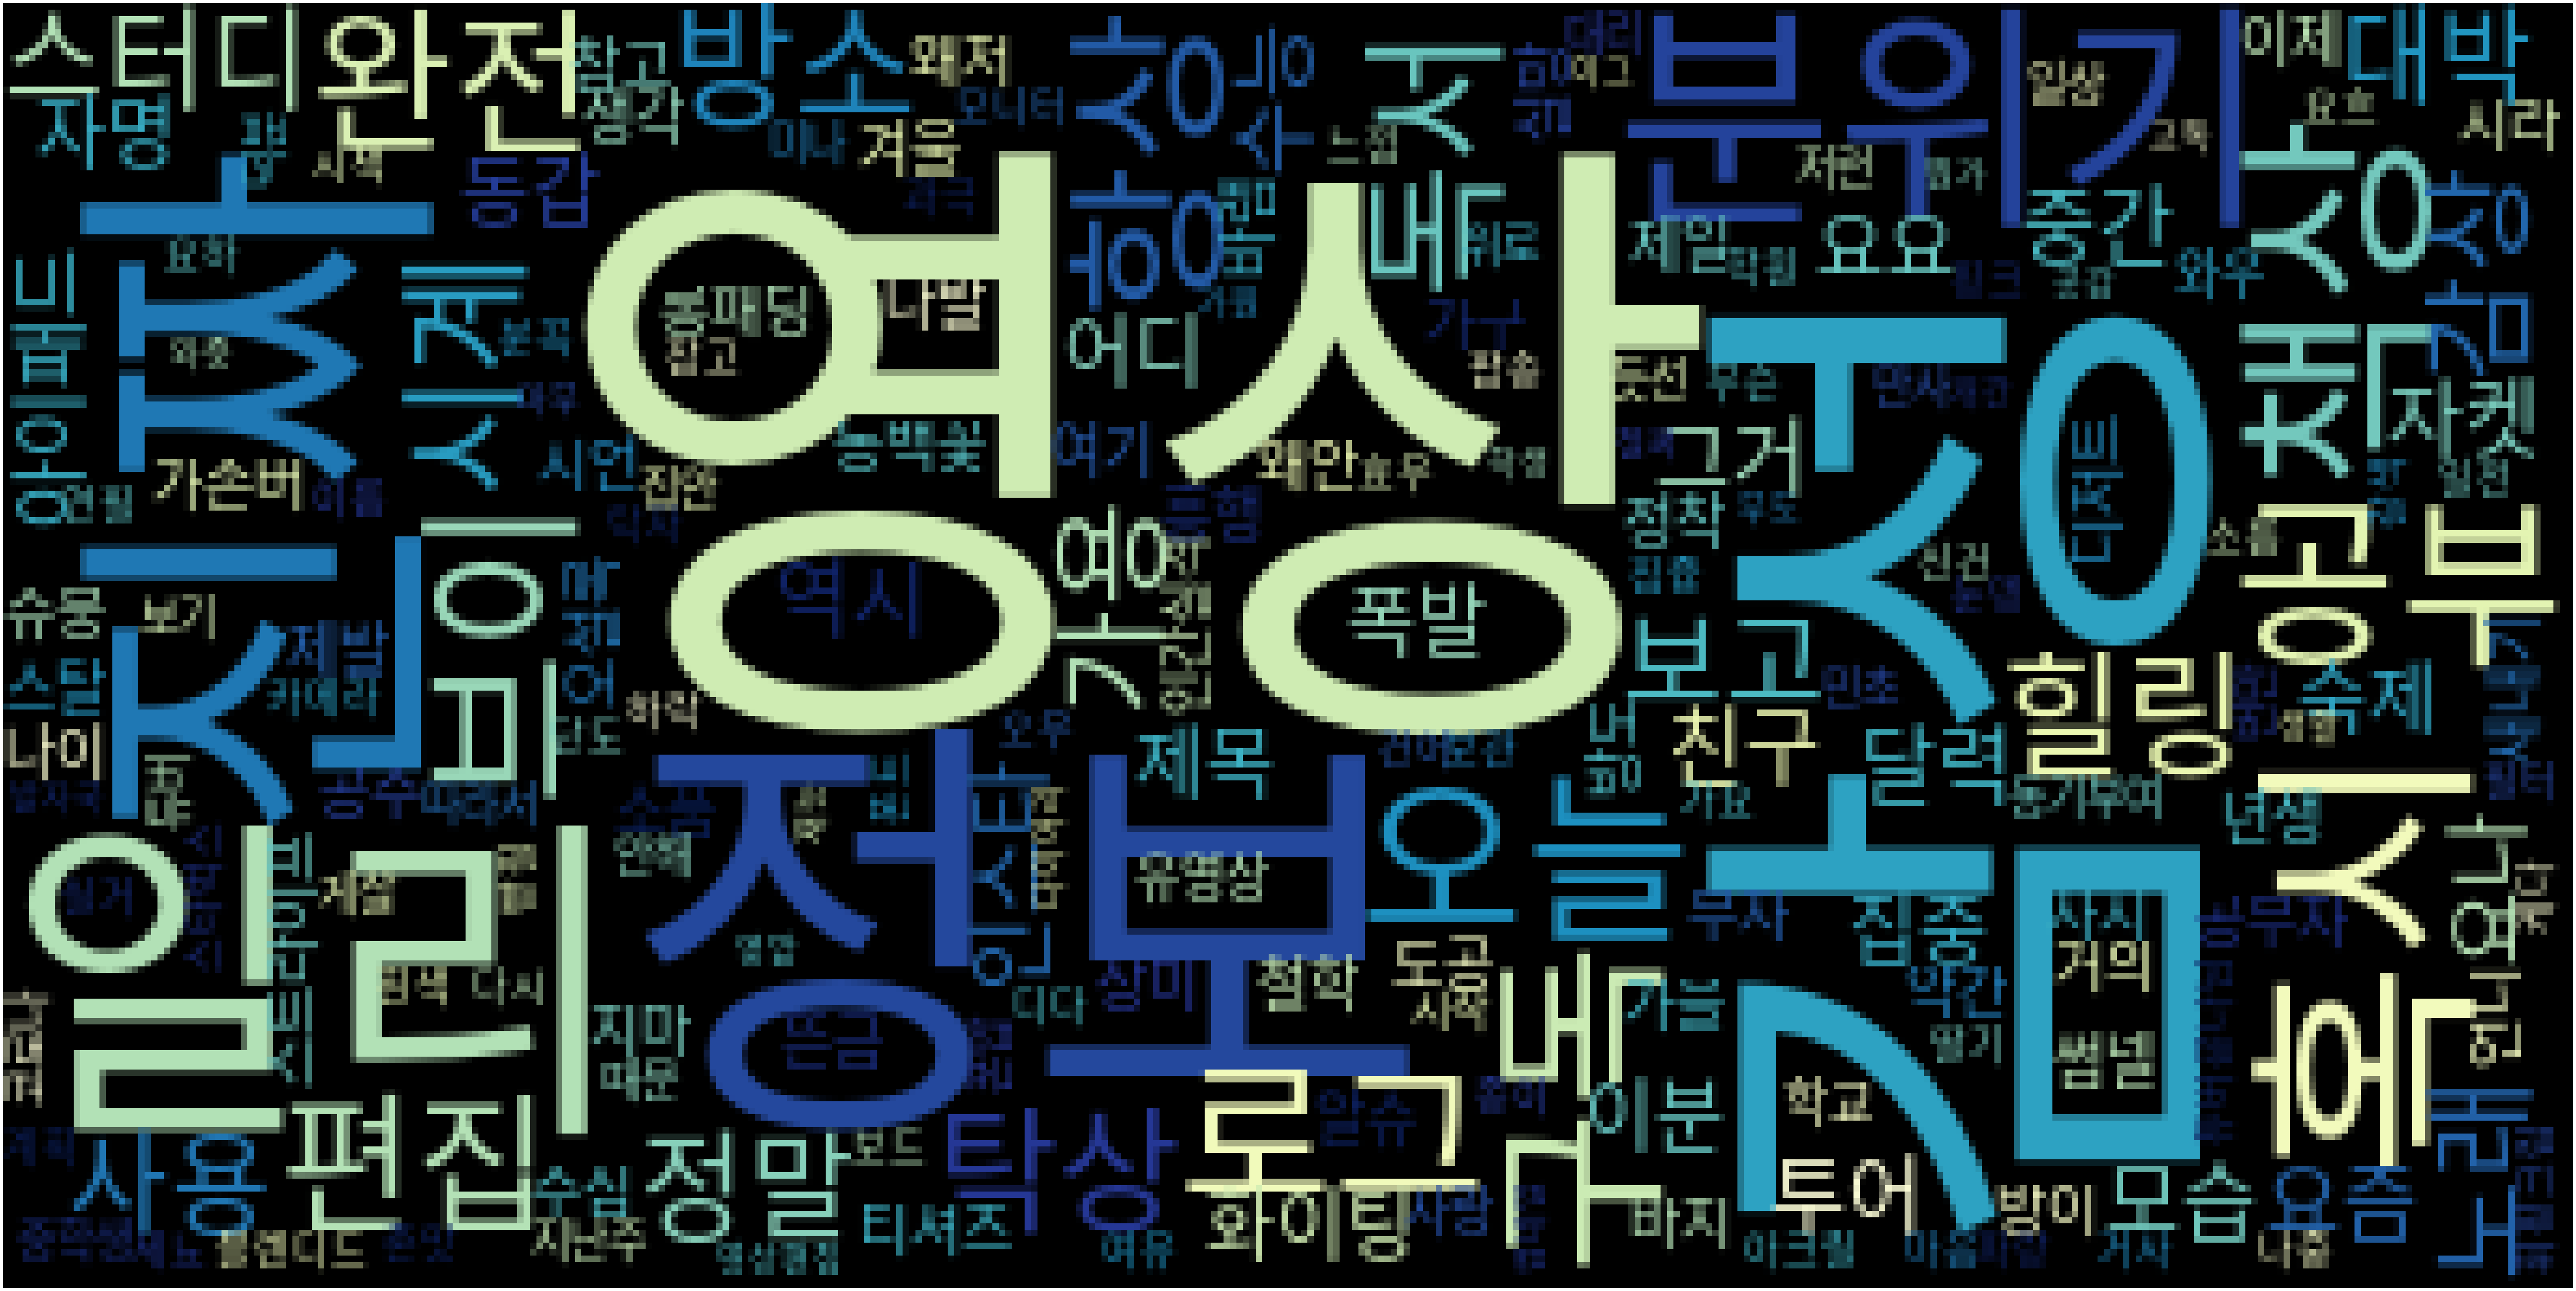

In [210]:
# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ï∂úÎ†•ÌïòÍ∏∞
cmap = plt.cm.YlGnBu
wc = WordCloud(font_path = '/Users/hwangjaewon/Downloads/NotoSansCJKkr-hinted/NotoSansMonoCJKkr-Regular.otf',      
               background_color = "black",  
               max_font_size = 100,         
               margin = 0,                  
               colormap = cmap)   
cloud = wc.generate_from_frequencies(word_dict)

#Ï†ÑÏ≤¥ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.figure(figsize=(100,100))
plt.imshow(cloud) 
plt.axis("off")
plt.show()

## eunseo Ï±ÑÎÑê Îã®Ïñ¥ ÎπàÎèÑÏàò Î∞è ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [211]:
eunseo_word=make_df(eunseo)
# Ìï®Ïàò Ï†ÅÏö©
data_list = []
eunseo_word[0].apply(tokenizing_and_cleaning)

0       None
1       None
2       None
3       None
4       None
        ... 
2849    None
2850    None
2851    None
2852    None
2853    None
Name: 0, Length: 2854, dtype: object

In [212]:
# data_list Î¶¨Ïä§Ìä∏ ÏïàÏùò Îã®Ïñ¥Îì§Î°ú ÌÜ†ÌÅ∞Îßå Îì§Ïñ¥ÏûàÎäî Î¶¨Ïä§Ìä∏Î•º ÎßåÎì†Îã§.
word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

all_token = pd.DataFrame(word_list, columns = ["ÌÜ†ÌÅ∞"])
c=Counter(all_token["ÌÜ†ÌÅ∞"])
most_word=c.most_common(200)
most_token = pd.DataFrame(most_word, columns = ["Îã®Ïñ¥ ÌÜ†ÌÅ∞", "ÎπàÎèÑ Ïàò"])
word_dict=dict(c.most_common(500))
word_dict

{'ÏòÅÏÉÅ': 122,
 'ÏùÄÏÑú': 87,
 'ÏßÑÏßú': 51,
 'Ï±ÖÏÉÅ': 46,
 'Ïò§Îäò': 38,
 'Í≥µÎ∂Ä': 32,
 'Í∞êÏÑ±': 24,
 'Î≥¥Í≥†': 22,
 'Ìï≠ÏÉÅ': 19,
 'ÌòπÏãú': 16,
 'Ï†ïÎ≥¥': 16,
 'Ìé∏Ïßë': 13,
 'Ï°∏ÏóÖ': 11,
 'Í∞ÄÏöî': 11,
 'ÏôÄÌîå': 11,
 'ÏôÑÏ†Ñ': 11,
 'Î∂ÑÏúÑÍ∏∞': 10,
 'Ï∂ïÌïò': 10,
 'ÏÇ¨Îûë': 9,
 'ÎèôÍ∞ë': 9,
 'ÏòÅÏñ¥': 9,
 'ÏÇ¨Ïù¥Ï¶à': 9,
 'ÎèÖÏÑú': 9,
 'Í≥ÑÏÜç': 8,
 'Íµ¨ÎèÖ': 8,
 'Îß§Ïùº': 8,
 'Ï†ïÎßê': 8,
 'ÎèÖÌïô': 8,
 'Î¨¥Ï±ÑÏÉâ': 7,
 'ÏùºÏÉÅ': 7,
 'Í¥ÄÍ≥ÑÎåÄÎ™ÖÏÇ¨': 7,
 'ÏûêÏ£º': 7,
 'Íµ¨Îß§': 7,
 'Ïñ¥Îîî': 7,
 'Ìï´Ìä∏ÎûôÏä§': 7,
 'Ïó≠Ïãú': 7,
 'Ïñ∏Îãà': 6,
 'Ï£ºÌñâ': 6,
 'Î≤àÏòÅ': 6,
 'Ïù∏Ïä§ÌÉÄ': 6,
 'ÏöîÏ¶ò': 6,
 'ÏßÄÍ∏à': 6,
 'Î¨∏Î≤ï': 6,
 'Í∏∞Í≥Ñ': 6,
 'ÌïÑÌÜµ': 6,
 'ÍµêÎ≥µ': 6,
 'Ìã∞Ï†∏': 6,
 'ÏïÑÏù¥Ìå®Îìú': 6,
 'Ï≤òÏùå': 6,
 'Ï°¥Í≤Ω': 5,
 'Î∏åÏù¥': 5,
 'Îã§Ïãú': 5,
 'ÎåÄÎ∞ï': 5,
 'Î∂ÄÎ∂Ñ': 5,
 'ÏñºÎßà': 5,
 'Ï∂îÏ≤ú': 5,
 'Îã§Ïùå': 5,
 'ÏàòÌïô': 5,
 'ÏãúÍ∞Ñ': 5,
 'ÎßåÏõê': 5,
 'Î™®Ïäµ': 4,
 'Î∞©ÏÜå': 4,
 'ÌûêÎßÅ': 4,
 'ÌÄÑÎ¶¨Ìã∞': 4,
 'ÎäêÎÇå': 4,
 'ÏàòÍ≥†': 4,
 'Í±±Ï†ï': 4,
 'Í≤ΩÏö

<Figure size 7200x7200 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

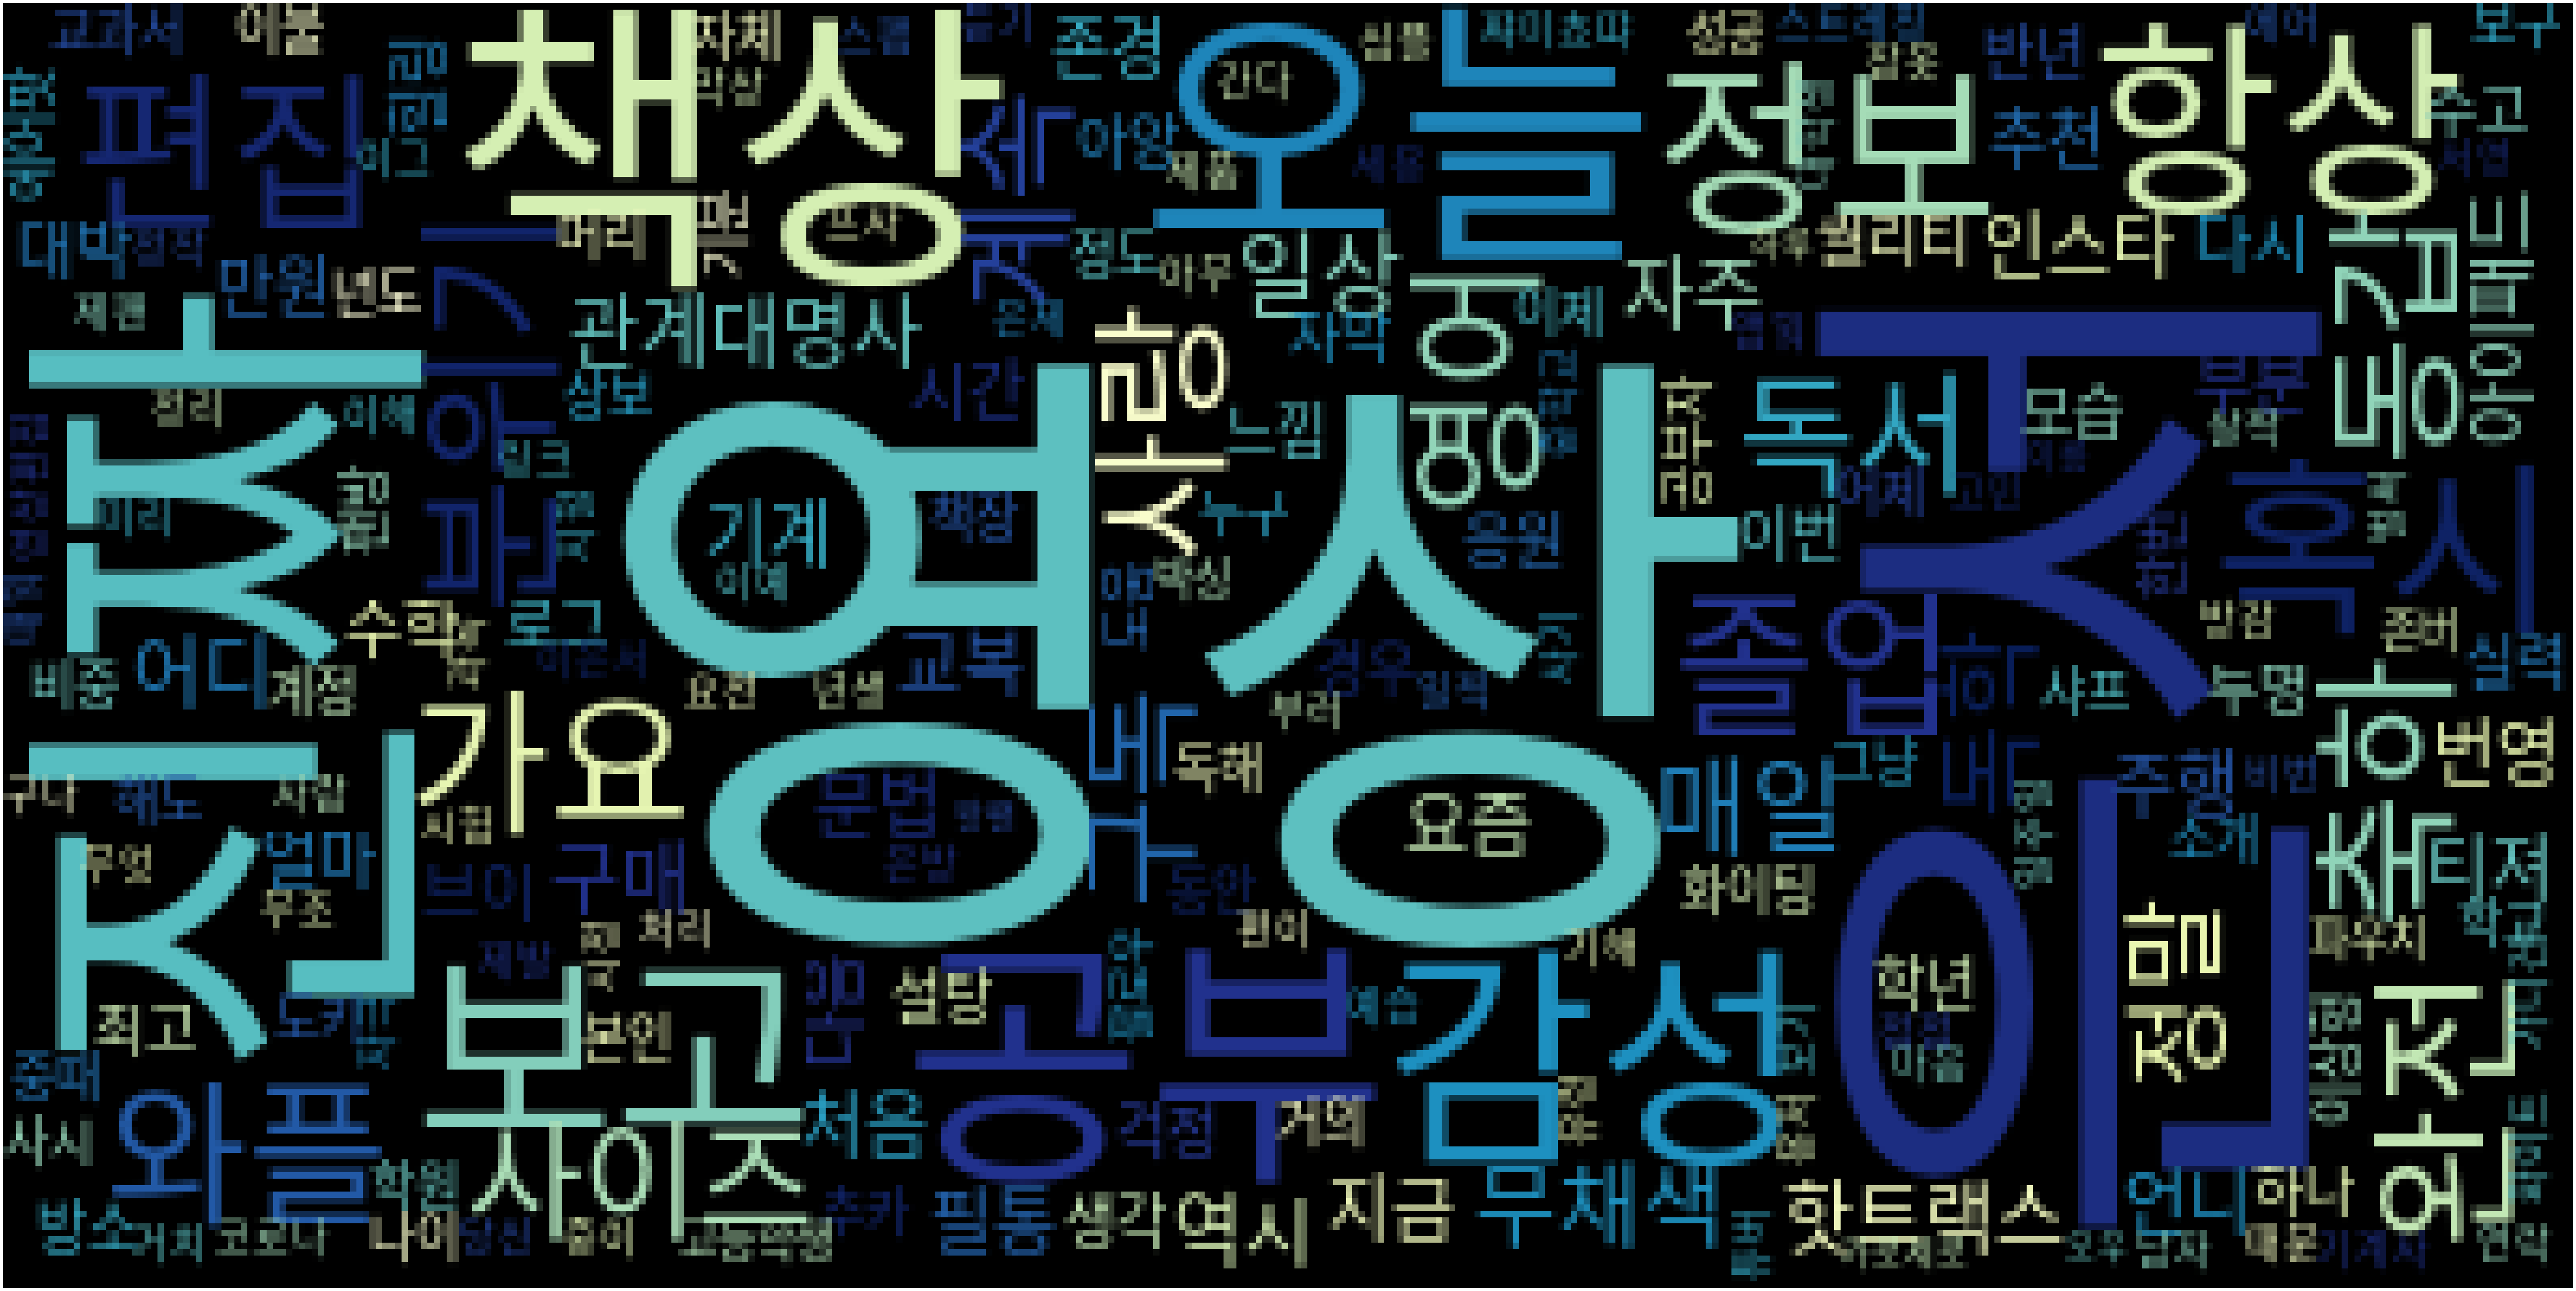

In [213]:
# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ï∂úÎ†•ÌïòÍ∏∞
cmap = plt.cm.YlGnBu
wc = WordCloud(font_path = '/Users/hwangjaewon/Downloads/NotoSansCJKkr-hinted/NotoSansMonoCJKkr-Regular.otf',      
               background_color = "black",  
               max_font_size = 100,         
               margin = 0,                  
               colormap = cmap)   
cloud = wc.generate_from_frequencies(word_dict)

#Ï†ÑÏ≤¥ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.figure(figsize=(100,100))
plt.imshow(cloud) 
plt.axis("off")
plt.show()

## feellim Ï±ÑÎÑê Îã®Ïñ¥ ÎπàÎèÑÏàò Î∞è ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [330]:
feellim_word=make_df(feellim)
# Ìï®Ïàò Ï†ÅÏö©
data_list = []
feellim_word[0].apply(tokenizing_and_cleaning)

0      None
1      None
2      None
3      None
4      None
       ... 
694    None
695    None
696    None
697    None
698    None
Name: 0, Length: 699, dtype: object

In [217]:
# data_list Î¶¨Ïä§Ìä∏ ÏïàÏùò Îã®Ïñ¥Îì§Î°ú ÌÜ†ÌÅ∞Îßå Îì§Ïñ¥ÏûàÎäî Î¶¨Ïä§Ìä∏Î•º ÎßåÎì†Îã§.
word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

all_token = pd.DataFrame(word_list, columns = ["ÌÜ†ÌÅ∞"])
c=Counter(all_token["ÌÜ†ÌÅ∞"])
most_word=c.most_common(200)
most_token = pd.DataFrame(most_word, columns = ["Îã®Ïñ¥ ÌÜ†ÌÅ∞", "ÎπàÎèÑ Ïàò"])
word_dict=dict(c.most_common(500))
word_dict

{'ÏòÅÏÉÅ': 26,
 'Î∏îÎûô': 17,
 'Î≥¥Í≥†': 11,
 'Í∞êÏÑ±': 11,
 'Î∏åÏù¥': 8,
 'Î°úÍ∑∏': 7,
 'ÏßÑÏßú': 6,
 'Í∏ÄÏî®': 6,
 'ÏùëÏõê': 5,
 'Ïó≠Ïãú': 5,
 'Íµ¨ÎèÖ': 5,
 'Î≥¥Í∏∞': 4,
 'ÎäêÎÇå': 4,
 'ÏôÑÏ†Ñ': 4,
 'Ï±ÑÎÑê': 4,
 'Ï†ïÎßê': 3,
 'ÎçïÌõÑ': 3,
 'ÎßàÏùå': 3,
 'Ïù∏ÌÖåÎ¶¨Ïñ¥': 3,
 'Í∞êÍ∞Å': 3,
 'ÏûêÏ£º': 3,
 'ÏûêÏ∑®': 3,
 'ÌôîÏù¥ÌåÖ': 3,
 'Ïò§Îäò': 3,
 'ÏÜåÎ¶¨': 3,
 'ÏóÑÎßà': 3,
 'Ï≤òÏùå': 3,
 'Î∂ÑÏúÑÍ∏∞': 3,
 'Ïù∏Ïä§ÌÉÄ': 3,
 'Ìú¥Ïãù': 3,
 'ÎåÄÏ∂©': 3,
 'ÏÉùÍ∞Å': 2,
 'ÏÜêÌÜ±ÍπéÏù¥': 2,
 'Ìï≠ÏÉÅ': 2,
 'Î°úÏÑú': 2,
 'ÏÇ¥Î¶º': 2,
 'ÏÉùÌôú': 2,
 'Ìó§Ìó§': 2,
 'ÏÉâÍ∞ê': 2,
 'Îã§Î•∏': 2,
 'Ïù∏Ìä∏': 2,
 'Ï∑®Ìñ•': 2,
 'Îã§Ïùå': 2,
 'Ïç∏ÎÑ§Ïùº': 2,
 'ÍπÄÏπòÏ†Ñ': 2,
 'ÎØºÌä∏': 2,
 'Ï£ºÏãú': 2,
 'Ïù¥Î≤à': 2,
 'ÌïúÎ≤à': 2,
 'ÌïÑÎ¶º': 2,
 'Ìé∏Ïßë': 2,
 'ÎÖ∏Ìä∏': 2,
 'ÎùºÎ≥∂Ïù¥': 2,
 'Îã®Î¨¥ÏßÄ': 2,
 'Ï°∞Í∏à': 2,
 'Í≥†ÏÉù': 2,
 'Îã®Îßõ': 2,
 'ÎèôÏòÅÏÉÅ': 2,
 'Î°úÏç®': 1,
 'ÎÇòÎ¶Ñ': 1,
 'Í≥†Î¨¥Ïû•Í∞ë': 1,
 'ÏÉÅÏÉÅ': 1,
 'ÏÑ±Ïï†Ïûê': 1,
 'Í∞êÎ™Ö': 1,
 'Í≥µÍ∞Ñ': 1,
 'Îß§Î†•': 1,
 'Í∞ÄÏõê': 1,
 'ÎåÄÎ¶¨': 1,

<Figure size 7200x7200 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

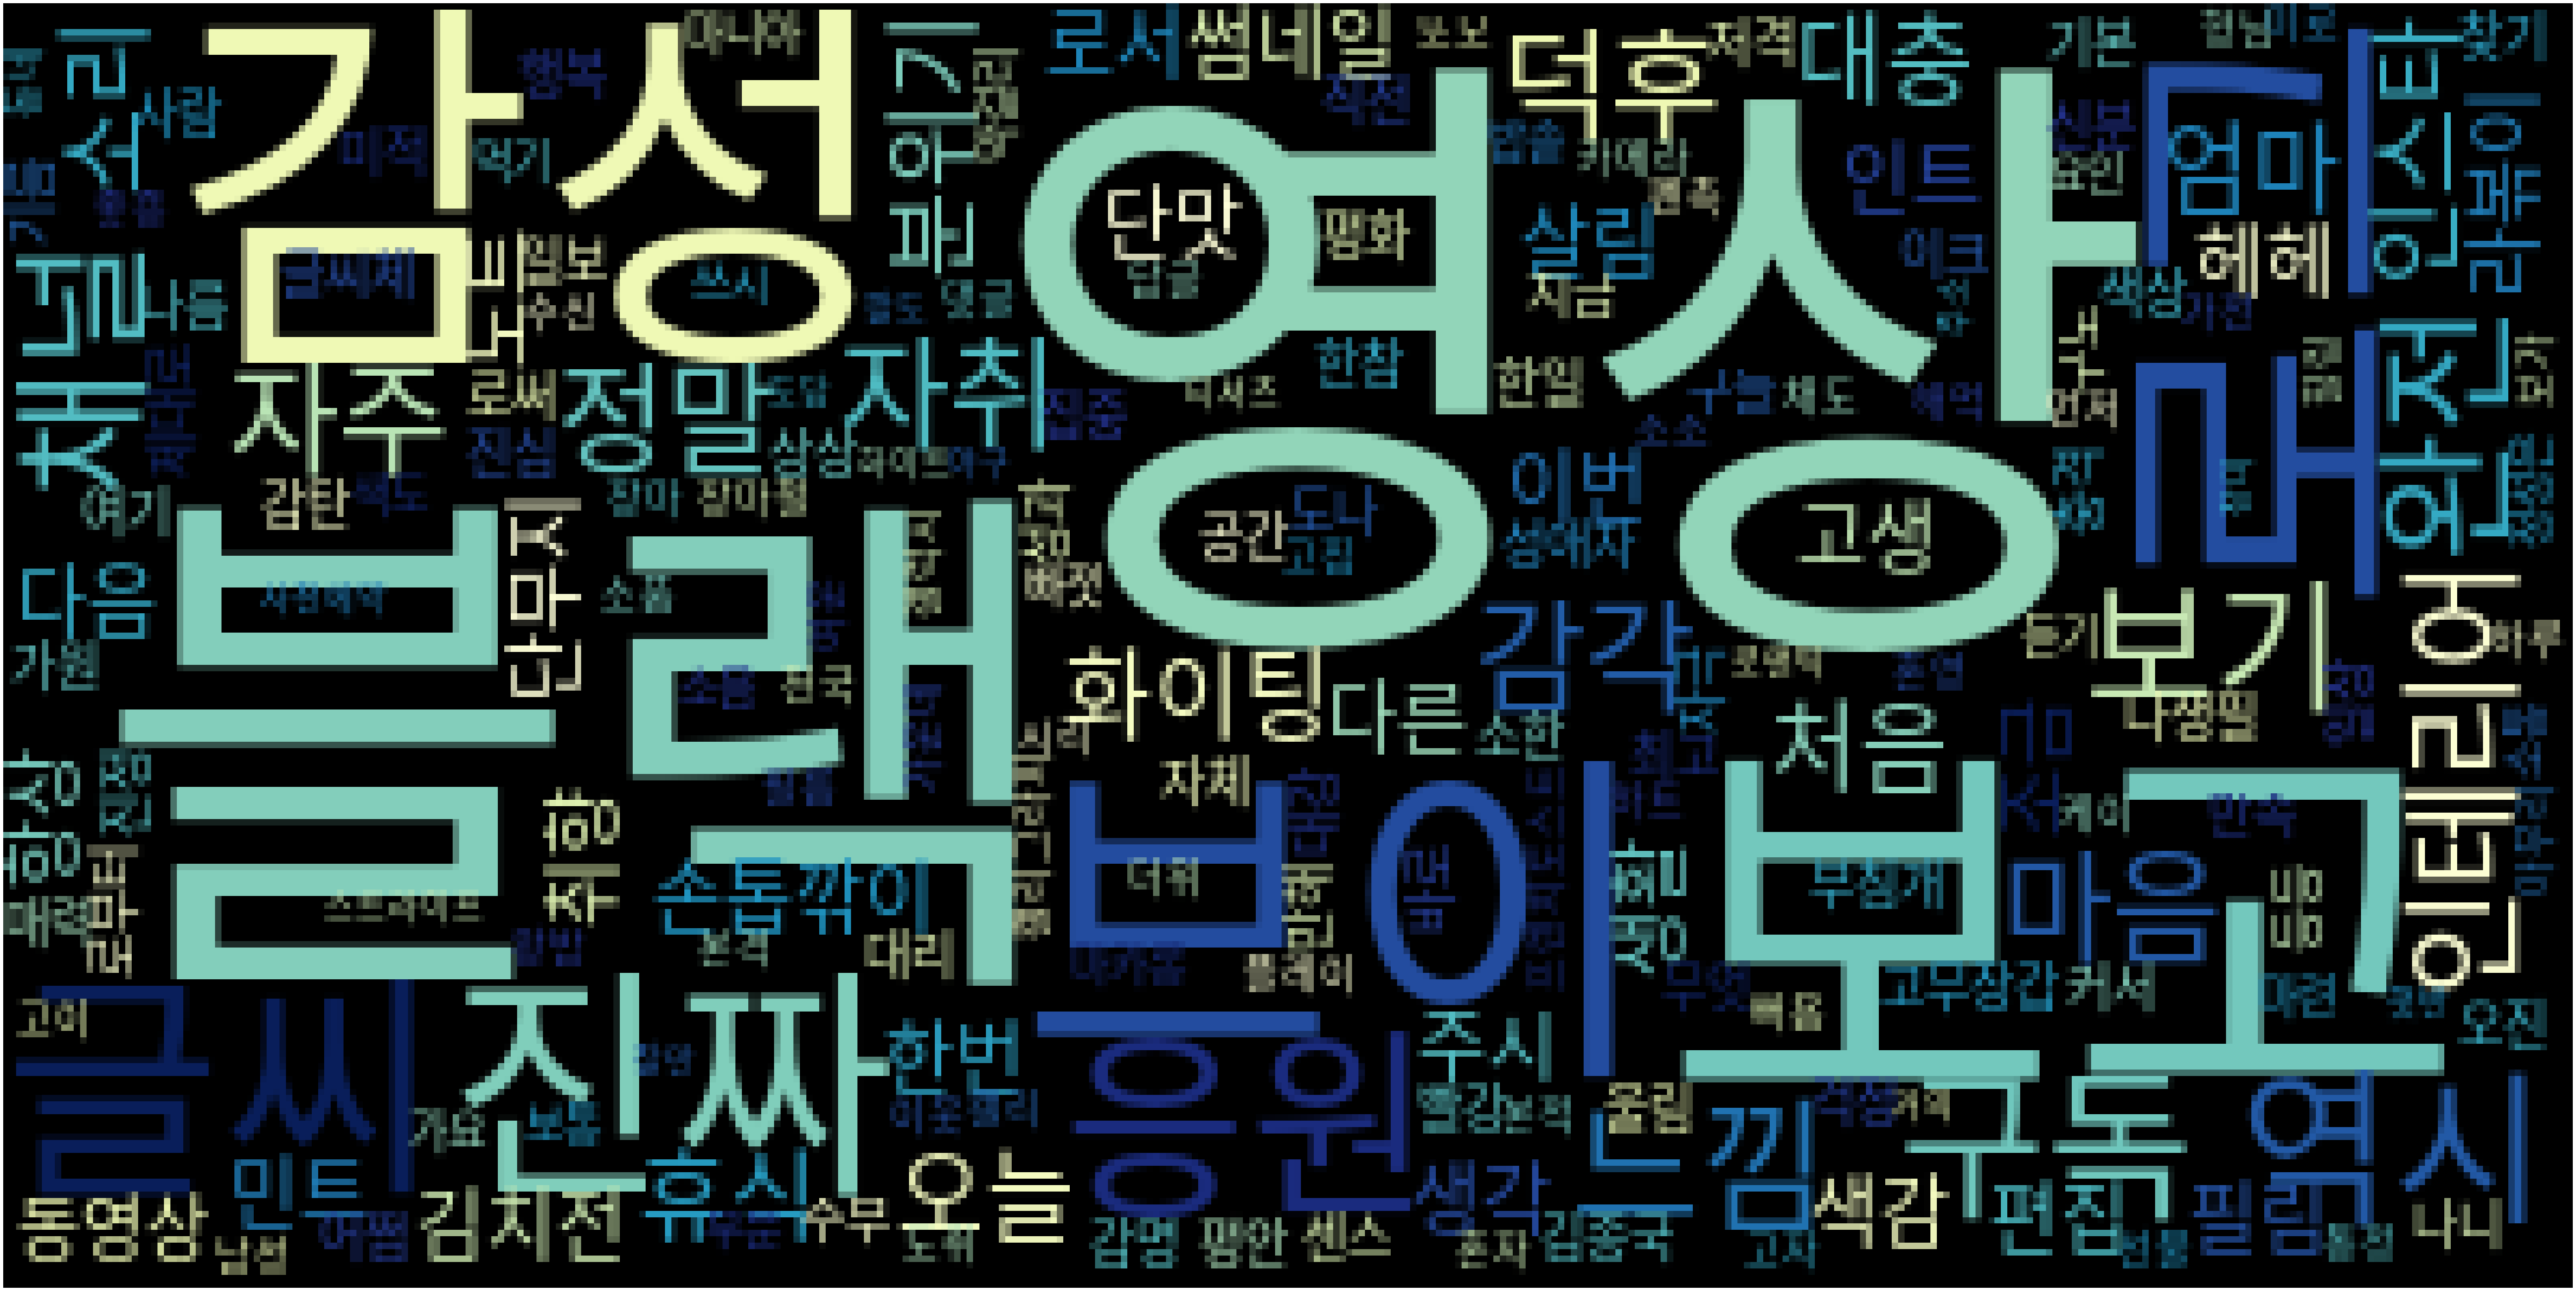

In [218]:
# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ï∂úÎ†•ÌïòÍ∏∞
cmap = plt.cm.YlGnBu
wc = WordCloud(font_path = '/Users/hwangjaewon/Downloads/NotoSansCJKkr-hinted/NotoSansMonoCJKkr-Regular.otf',      
               background_color = "black",  
               max_font_size = 100,         
               margin = 0,                  
               colormap = cmap)   
cloud = wc.generate_from_frequencies(word_dict)

#Ï†ÑÏ≤¥ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.figure(figsize=(100,100))
plt.imshow(cloud) 
plt.axis("off")
plt.show()

# Í∞êÏÑ±Î∂ÑÏÑù

In [220]:
polarity = pd.read_csv("polarity.csv")
# Í∏çÏ†ïÏÇ¨Ï†Ñ, Î∂ÄÏ†ïÏÇ¨Ï†Ñ
positive = polarity[(polarity['max.value']=='POS') & (polarity['max.prop']>=0.5)]
positive = positive.loc[:,['ngram']]

negative = polarity[(polarity['max.value']=='NEG') & (polarity['max.prop']>=0.5)]
negative = negative.loc[:,['ngram']]

pol = positive.append(negative)

In [257]:
def sentences(crawl):
    sentences = []
    for item in crawl:
        morph = mecab.pos(item)
        sentences.append(morph)
    return sentences

In [260]:
def review_score(sentences):
    review_score = pd.DataFrame(columns=['comment','score'])
    for sentence in sentences:
        score=0
        for word in sentence:
            word ='/'.join(word)
            for i in positive['ngram']:
                if (word==i):
                    score += 1
            for i in negative['ngram']:
                if (word==i):
                    score -= 1
        review_score = review_score.append(pd.DataFrame([[sentence, score]],columns=['comment','score']))
    return review_score

In [264]:
def senti(review_score):
    total = len(review_score['score'])
    countpos = review_score.apply(
        lambda review_score:
        True if review_score['score'] >0 else False , axis=1)
    numpos = len(countpos[countpos == True].index)
    countneg= review_score.apply(
        lambda review_score:
        True if review_score['score'] < 0 else False , axis=1)
    numneg = len(countneg[countneg == True].index)
    senti= numpos/(numneg)
    return senti

In [261]:
sentences_d=sentences(daily.Comment.tolist())
sentences_e=sentences(eunseo.Comment.tolist())
sentences_f=sentences(feellim.Comment.tolist())

In [262]:
daily_score=review_score(sentences_d)
eunseo_score=review_score(sentences_e)
feellim_score=review_score(sentences_f)

In [269]:
senti(daily_score)
senti(eunseo_score)
senti(feellim_score)

1.2

0.7586206896551724

1.5833333333333333